EVALUACIÓN FINAL MÓDULO 5
Ciencia de Datos

Nombre: Pablo Salvador González **texto en negrita**

Imagina que trabajas en una institución educativa interesada en evaluar si un nuevo programa de tutoría mejora el rendimiento académico de los estudiantes. Para ello, se selecciona una muestra de 30 estudiantes, divididos en dos grupos:

•	Grupo A (15 estudiantes): Recibe el programa de tutoría.
•	Grupo B (15 estudiantes): No recibe el programa (grupo de control).

Los resultados del rendimiento académico se miden mediante un examen estándar, donde las calificaciones oscilan entre 0 y 100 puntos. Los datos obtenidos son los siguientes:

Grupo A (Tutoría) 	Grupo B (Control)
85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88 	70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80

 *Objetivo*
Evaluar la capacidad del estudiante para aplicar los conceptos aprendidos en las sesiones previas, incluyendo el diseño de experimentos, cálculo de probabilidades, inferencia estadística, pruebas de hipótesis y análisis de datos.


**Pregunta 1.**	Diseño del Experimento (1 puntos)
-	Explica brevemente cómo se podría mejorar el diseño del experimento para reducir posibles sesgos.


**Respuesta:**
En primer lugar, para asegurarse de que los alumnos han respondido a un cambio debido al tratamiento (programa de tutoría), sería necesario conocer resultados en el examen (en ambos grupos), previo a recibir el tratamiento, para de esta manera, saber no solo si han superado al grupo contrario, si no para saber si el tratamiento ha tenido un efecto sobre su desempeño previo. De esta manera descartamos que no hayan sido mejores alumnos previo al experimento.

Este cambio en el diseño, nos permitiría conocer cuantitativamente, si existe una diferencia tanto entre grupos, como dentro del mismo grupo dónde se aplica el tratamiento. De la misma manera, en el grupo de control podríamos saber si se mantienen las evaluaciones de manera equivalente, ya que no debiera haber una mejora sustancial como en el grupo donde hubo un tratamiento.


**Pregunta 2.**	Cálculo de Estadísticas Descriptivas (3 puntos)
-	Calcula la media y la desviación estándar para ambos grupos.
-	Representa los datos gráficamente (usando histogramas o diagramas de caja).


Grupo A: media=85.87; desviación estándar= 3.88
Grupo B: media=75.07; desviación estándar= 3.59


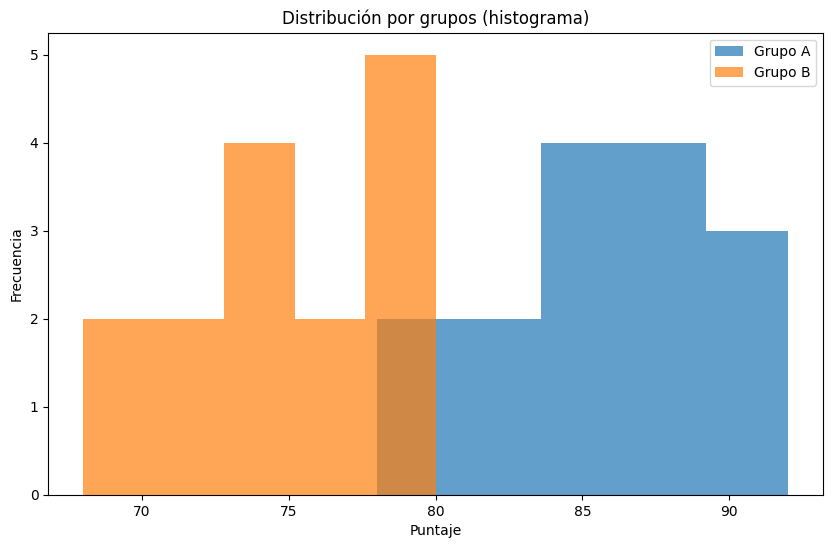

<Figure size 1000x600 with 0 Axes>

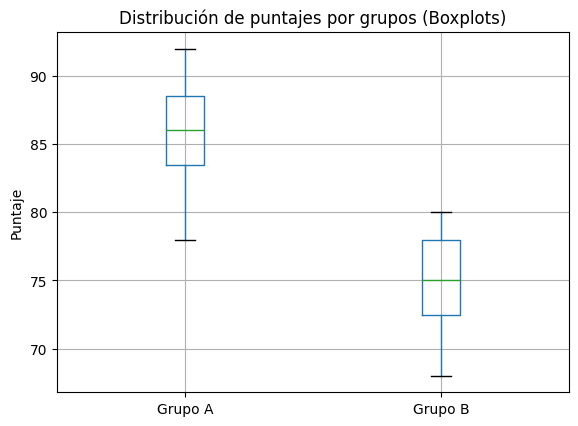

In [12]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import pandas as pd

grupo_a = [85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88]
grupo_b = [70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80]

media_a = np.mean(grupo_a)
media_b = np.mean(grupo_b)

desviacion_a = np.std(grupo_a)
desviacion_b = np.std(grupo_b)

print(f"Grupo A: media={media_a:.2f}; desviación estándar= {desviacion_a:.2f}")
print(f"Grupo B: media={media_b:.2f}; desviación estándar= {desviacion_b:.2f}")

df = pd.DataFrame({
    'Score': grupo_a + grupo_b,
    'Group': ['Grupo A'] * len(grupo_a) + ['Grupo B'] * len(grupo_b)
})

#Histograma
plt.figure(figsize=(10, 6))
plt.hist(df[df['Group'] == 'Grupo A']['Score'], alpha=0.7, label='Grupo A', bins=5)
plt.hist(df[df['Group'] == 'Grupo B']['Score'], alpha=0.7, label='Grupo B', bins=5)
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.title('Distribución por grupos (histograma)')
plt.legend()
plt.show()

#Boxplots
plt.figure(figsize=(10, 6))
df.boxplot(column='Score', by='Group')
plt.xlabel("")
plt.ylabel('Puntaje')
plt.title('Distribución de puntajes por grupos (Boxplots)')
plt.suptitle('') # Suppress the default title
plt.show()

**Pregunta 3**	Prueba de Hipótesis (4 puntos)

-	Plantea la hipótesis nula (H0) y alternativa (H1).

**Respuesta:**

H0: No hay diferencia en el rendimiento académico entre los dos grupos.

H1: El grupo con tutoría tiene un mejor rendimiento académico.

-	Realiza una prueba t para comparar las medias de ambos grupos. Usa un nivel de significancia (α=0.05).
-	Interpreta el valor-p y decide si rechazas o no la hipótesis nula.


In [17]:
import numpy as np
from scipy.stats import ttest_ind # Importar ttest_ind

grupo_a = [85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88]
grupo_b = [70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80]

# Realizar una prueba t de muestras independientes
t_stat, p_valor = ttest_ind(grupo_a, grupo_b)

alpha = 0.05 # Nivel de significancia

# Resultados
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor-p: {p_valor:.4f}")

# Decisión
if p_valor < alpha:
    print("Se rechaza H0. Existe una diferencia significativa en el rendimiento académico entre los dos grupos.")
else:
    print("No se rechaza H0. No hay suficiente evidencia para decir que existe una diferencia significativa en el rendimiento académico entre los dos grupos.")

Estadístico t: 7.65
Valor-p: 0.0000
Se rechaza H0. Existe una diferencia significativa en el rendimiento académico entre los dos grupos.


**Pregunta 4.** Intervalo de Confianza (2 puntos)
- Calcula un intervalo de confianza del 95% para la diferencia de medias entre los dos grupos.
- Interpreta el resultado.

In [16]:
import numpy as np
from scipy.stats import t

grupo_a = [85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88]
grupo_b = [70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80]

#Estadísticos para el cálculo del 95%
mean_a = np.mean(grupo_a)
mean_b = np.mean(grupo_b)
std_a = np.std(grupo_a, ddof=1)
std_b = np.std(grupo_b, ddof=1)
n_a = len(grupo_a)
n_b = len(grupo_b)

# Calcular la desviación estándar agrupada
pooled_std = np.sqrt(((n_a - 1) * std_a**2 + (n_b - 1) * std_b**2) / (n_a + n_b - 2))

# Calcular el error estándar de la diferencia
std_error_diff = pooled_std * np.sqrt(1/n_a + 1/n_b)

# Calcular los grados de libertad
degrees_freedom = n_a + n_b - 2

# Calcular el valor t-crítico para un intervalo de confianza del 95 %
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, degrees_freedom)

# Calcular el margen de error
margin_of_error = t_critical * std_error_diff

# Calcular el intervalo de confianza
confidence_interval_lower = (mean_a - mean_b) - margin_of_error
confidence_interval_upper = (mean_a - mean_b) + margin_of_error

print(f"Diferencia de medias (Grupo A - Grupo B): {mean_a - mean_b:.2f}")
print(f"Intervalo de Confianza del 95% para la diferencia de medias: ({confidence_interval_lower:.2f}, {confidence_interval_upper:.2f})")

Diferencia de medias (Grupo A - Grupo B): 10.80
Intervalo de Confianza del 95% para la diferencia de medias: (7.91, 13.69)


**Respuesta**

Dado que el intervalo (7,91; 13,69) no contiene al cero, esto sugiere que existe una diferencia estadísticamente significativa entre las medias de los dos grupos, por lo tanto son grupos distintos y el tratamiento (tutorías) tiene un efecto positivo en el rendimiento (aumento de puntajes en el exámen).